In [57]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('/content/Results.DevelopmentalDelayintheAmazon.xlsx - Sheet 1 (1).csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,Community,District,Age,Sex,Age of Mother at birth,number of children,Age at first birth of mother,education,ocupaction,toilet,radio,television,cellular,economy,maternal vitimans,illness during prenancy,illness of child,diarrea days,CRED,location of birth,birth weight,Breastfed cleaned,breastfed months,exclusive breastfed age,micronutrients cleaned,micronutrients months,CHA visits,CPVC visits,dewormer yes or no,dewormer,vacinations,ASQ Comunicación,ASQ Motora Gruesa,DIT Preg 01,DIT Preg 02,DIT Preg 10,Cutoff Comm,Cutoff Motora Gruesa,Deficiencia Comm,Deficiencia Motora Gruesa,Nivel de Deficiencia,developmentaldelay,water,water treatment,electricity hours
0,2,Bufeo Pozo,Sepahua,39.0,0.0,26.0,4,16.0,2,1,3,1,1,1.0,3,2,0,0,4,1,1,2.80,6.0,6,6,0.0,0,0,0,0.0,0,1,45.0,60.0,1.0,1,1,30.99,36.99,0.0,0.0,0.0,0.0,1,1,3.0
1,3,Bufeo Pozo,Sepahua,37.0,0.0,25.0,2,17.0,3,1,3,0,0,1.0,1,3,0,1,0,0,1,NaN,6.0,6,6,24.0,24,0,0,0.0,0,0,25.0,60.0,0.0,0,1,30.99,36.99,1.0,0.0,1.0,1.0,1,1,3.0
2,4,Bufeo Pozo,Sepahua,15.0,1.0,21.0,3,15.0,3,1,2,1,1,0.0,2,0,0,0,7,1,1,x,NaN,x,6,NaN,x,1,0,NaN,x,1,35.0,40.0,1.0,1,0,13.06,37.38,0.0,0.0,0.0,0.0,1,1,3.0
3,5,Bufeo Pozo,Sepahua,19.0,1.0,39.0,5,15.0,2,1,2,0,0,0.0,0,0,0,1,7,1,1,3,NaN,x,6,NaN,x,2,1,0.0,0,1,50.0,40.0,NaN,NaN,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0
4,6,Bufeo Pozo,Sepahua,20.0,1.0,17.0,1,17.0,4,1,2,1,1,1.0,3,6,2,1,2,0,2,3.60,NaN,x,6,15.0,15,0,0,0.0,0,0,55.0,60.0,NaN,NaN,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0


In [5]:
y1 = df['Cutoff Comm']
y2 = df['Cutoff Motora Gruesa']

In [6]:
asq = df['ASQ Motora Gruesa']
asq

0      60.0
1      60.0
2      40.0
3      40.0
4      60.0
       ... 
598    60.0
599    60.0
600    60.0
601    60.0
602    60.0
Name: ASQ Motora Gruesa, Length: 603, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            603 non-null    int64  
 1   Community                     603 non-null    object 
 2   District                      603 non-null    object 
 3   Age                           601 non-null    float64
 4   Sex                           600 non-null    float64
 5   Age of Mother at birth        599 non-null    float64
 6   number of children            572 non-null    object 
 7   Age at first birth of mother  599 non-null    float64
 8   education                     603 non-null    int64  
 9   ocupaction                    599 non-null    object 
 10  toilet                        603 non-null    int64  
 11  radio                         603 non-null    int64  
 12  television                    603 non-null    int64  
 13  cellu

In [8]:
df.describe()

,ID,Age,Sex,Age of Mother at birth,Age at first birth of mother,education,toilet,radio,television,cellular,economy,maternal vitimans,diarrea days,CRED,location of birth,Breastfed cleaned,micronutrients cleaned,CHA visits,CPVC visits,dewormer yes or no,ASQ Comunicación,ASQ Motora Gruesa,DIT Preg 01,Cutoff Comm,Cutoff Motora Gruesa,Deficiencia Comm,Deficiencia Motora Gruesa,Nivel de Deficiencia,developmentaldelay,water,electricity hours
count,603.000000,601.000000,600.000000,599.000000,599.000000,603.000000,603.000000,603.000000,603.000000,601.000000,603.000000,603.000000,603.000000,603.000000,603.000000,415.000000,442.000000,603.000000,603.000000,425.000000,591.000000,591.000000,354.000000,596.000000,596.000000,593.000000,593.000000,594.000000,596.000000,603.000000,603.000000
mean,303.689884,23.871880,0.526667,25.240401,17.859766,2.494196,2.134328,0.444444,0.630182,0.582363,1.655058,3.776119,2.129353,0.824212,1.704809,13.968675,9.495475,0.713101,0.739635,0.574118,37.478849,48.504230,0.765537,23.441309,33.894430,0.195616,0.112985,0.308081,0.265101,1.747927,14.494196
std,174.998353,9.122786,0.499705,7.523362,3.456423,0.668128,0.747220,0.500646,0.483156,0.493581,1.048850,2.895975,3.379612,0.380955,0.456507,5.813235,9.699860,0.873537,1.377394,0.495059,15.187723,13.376158,0.480614,6.706788,5.296154,0.397009,0.316842,0.545750,0.441758,1.225209,9.272878
min,2.000000,1.000000,0.000000,13.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.040000,21.490000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,152.500000,16.000000,0.000000,19.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,30.000000,40.000000,0.000000,16.810000,28.010000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,303.000000,24.000000,1.000000,24.000000,17.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,2.000000,14.000000,9.000000,1.000000,0.000000,1.000000,40.000000,50.000000,1.000000,24.020000,36.990000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000
75%,455.500000,32.000000,1.000000,30.000000,19.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,6.000000,3.000000,1.000000,2.000000,18.000000,16.750000,1.000000,1.000000,1.000000,50.000000,60.000000,1.000000,30.990000,37.380000,0.000000,0.000000,1.000000,1.000000,3.000000,24.000000
max,606.000000,39.000000,1.000000,46.000000,41.000000,4.000000,4.000000,2.000000,1.000000,1.000000,3.000000,9.000000,30.000000,1.000000,2.000000,38.000000,38.000000,4.000000,4.000000,1.000000,60.000000,60.000000,2.000000,33.300000,39.890000,1.000000,1.000000,2.000000,1.000000,4.000000,24.000000


In [9]:
df.columns

Index(['ID', 'Community', 'District', 'Age', 'Sex', 'Age of Mother at birth',
       'number of children', 'Age at first birth of mother', 'education',
       'ocupaction', 'toilet', 'radio', 'television', 'cellular', 'economy',
       'maternal vitimans', 'illness during prenancy', 'illness of child',
       'diarrea days', 'CRED', 'location of birth', 'birth weight',
       'Breastfed cleaned', 'breastfed months', 'exclusive breastfed age',
       'micronutrients cleaned', 'micronutrients months', 'CHA visits',
       'CPVC visits', 'dewormer yes or no', 'dewormer', 'vacinations',
       'ASQ Comunicación', 'ASQ Motora Gruesa', 'DIT Preg 01', 'DIT Preg 02',
       'DIT Preg 10', 'Cutoff Comm', 'Cutoff Motora Gruesa',
       'Deficiencia Comm', 'Deficiencia Motora Gruesa', 'Nivel de Deficiencia',
       'developmentaldelay', 'water', 'water treatment', 'electricity hours'],
      dtype='object')

In [10]:
correlation_matrix = df.corr()

<ipython-input-10-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


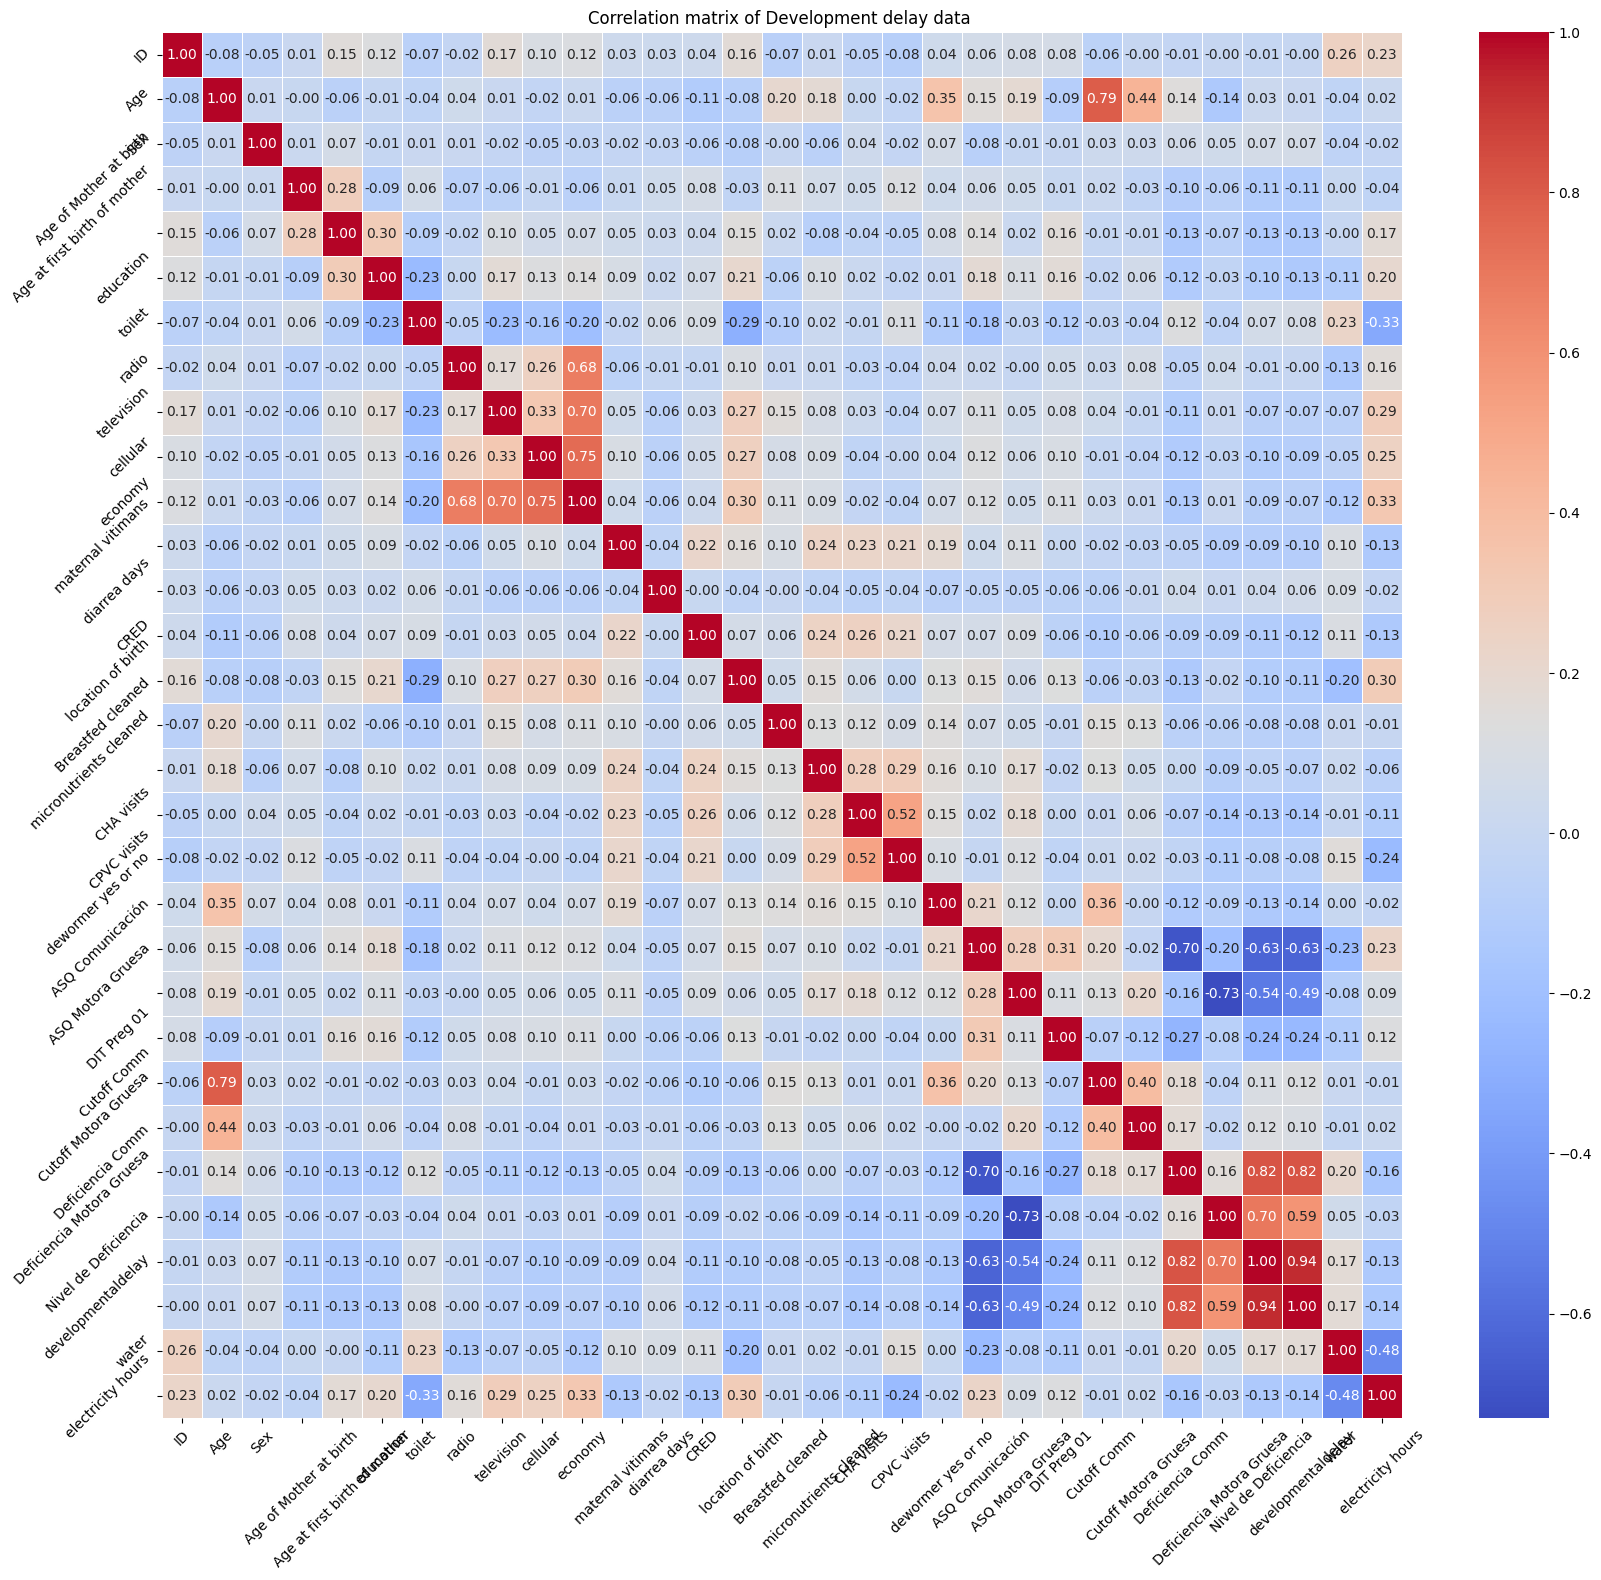

In [11]:
plt.figure(figsize = (20,18))

sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm',fmt=".2f", linewidth= 0.5)

plt.title('Correlation matrix of Development delay data ')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [12]:
sd = pd.read_csv('/content/Results.DevelopmentalDelayintheAmazon.xlsx - Sheet 1 (1).csv', usecols = ['Age',
                                                                                                     'maternal vitimans',
                                                                                                     'illness during prenancy',
                                                                                                     'birth weight',
                                                                                                     'Breastfed cleaned',
                                                                                                     'vacinations',
                                                                                                     'ASQ Comunicación',
                                                                                                     'ASQ Motora Gruesa',
                                                                                                     'Cutoff Comm',
                                                                                                     'Cutoff Motora Gruesa'])


In [13]:
df.head()

,ID,Community,District,Age,Sex,Age of Mother at birth,number of children,Age at first birth of mother,education,ocupaction,toilet,radio,television,cellular,economy,maternal vitimans,illness during prenancy,illness of child,diarrea days,CRED,location of birth,birth weight,Breastfed cleaned,breastfed months,exclusive breastfed age,micronutrients cleaned,micronutrients months,CHA visits,CPVC visits,dewormer yes or no,dewormer,vacinations,ASQ Comunicación,ASQ Motora Gruesa,DIT Preg 01,DIT Preg 02,DIT Preg 10,Cutoff Comm,Cutoff Motora Gruesa,Deficiencia Comm,Deficiencia Motora Gruesa,Nivel de Deficiencia,developmentaldelay,water,water treatment,electricity hours
0,2,Bufeo Pozo,Sepahua,39.0,0.0,26.0,4,16.0,2,1,3,1,1,1.0,3,2,0,0,4,1,1,2.80,6.0,6,6,0.0,0,0,0,0.0,0,1,45.0,60.0,1.0,1,1,30.99,36.99,0.0,0.0,0.0,0.0,1,1,3.0
1,3,Bufeo Pozo,Sepahua,37.0,0.0,25.0,2,17.0,3,1,3,0,0,1.0,1,3,0,1,0,0,1,NaN,6.0,6,6,24.0,24,0,0,0.0,0,0,25.0,60.0,0.0,0,1,30.99,36.99,1.0,0.0,1.0,1.0,1,1,3.0
2,4,Bufeo Pozo,Sepahua,15.0,1.0,21.0,3,15.0,3,1,2,1,1,0.0,2,0,0,0,7,1,1,x,NaN,x,6,NaN,x,1,0,NaN,x,1,35.0,40.0,1.0,1,0,13.06,37.38,0.0,0.0,0.0,0.0,1,1,3.0
3,5,Bufeo Pozo,Sepahua,19.0,1.0,39.0,5,15.0,2,1,2,0,0,0.0,0,0,0,1,7,1,1,3,NaN,x,6,NaN,x,2,1,0.0,0,1,50.0,40.0,NaN,NaN,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0
4,6,Bufeo Pozo,Sepahua,20.0,1.0,17.0,1,17.0,4,1,2,1,1,1.0,3,6,2,1,2,0,2,3.60,NaN,x,6,15.0,15,0,0,0.0,0,0,55.0,60.0,NaN,NaN,NaN,20.50,39.89,0.0,0.0,0.0,0.0,1,1,3.0


In [14]:
correlation_matrix = sd.corr()

<ipython-input-14-84a786ce5b3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sd.corr()


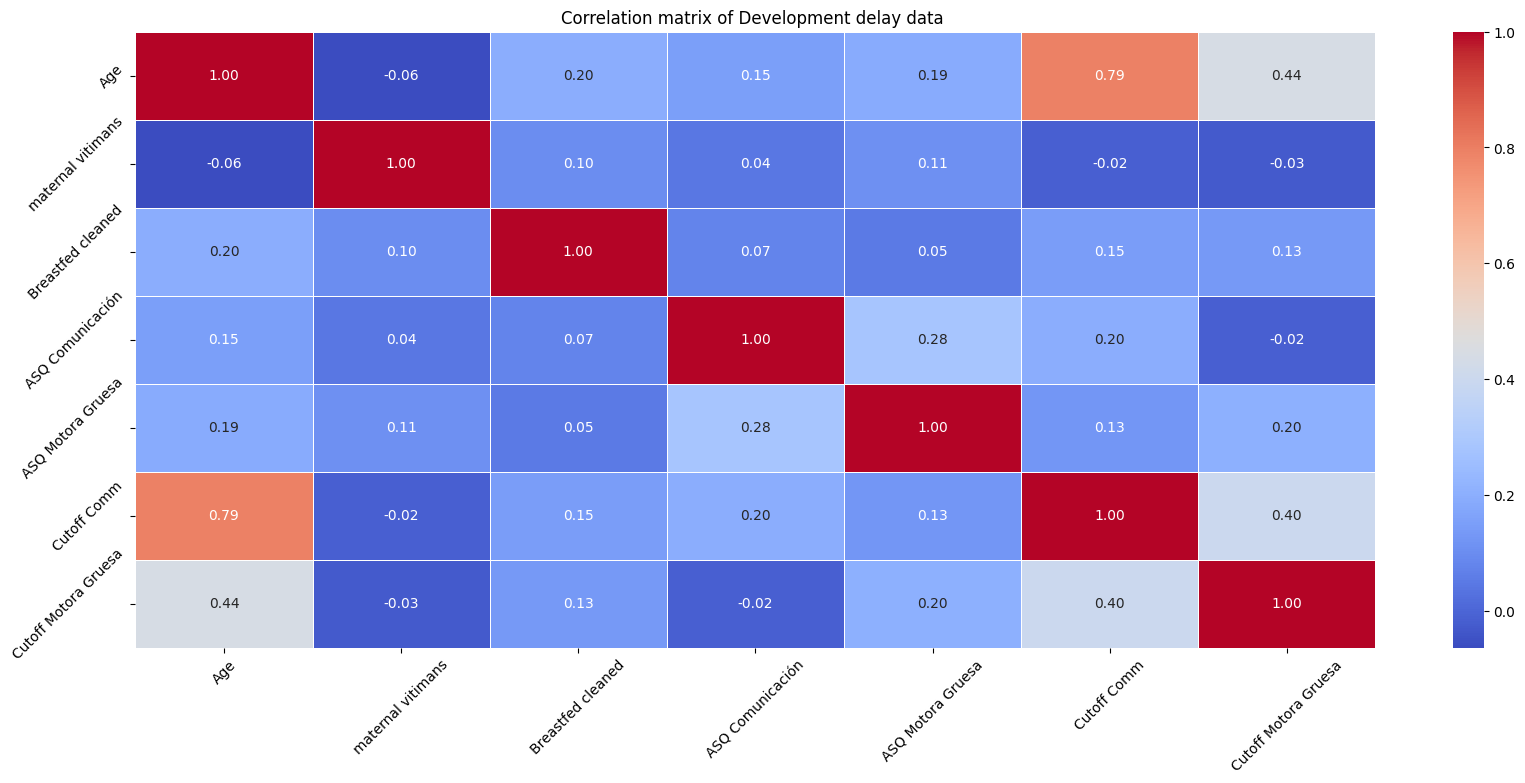

In [15]:
plt.figure(figsize = (20,8))

sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm',fmt=".2f", linewidth= 0.5)

plt.title('Correlation matrix of Development delay data ')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            603 non-null    int64  
 1   Community                     603 non-null    object 
 2   District                      603 non-null    object 
 3   Age                           601 non-null    float64
 4   Sex                           600 non-null    float64
 5   Age of Mother at birth        599 non-null    float64
 6   number of children            572 non-null    object 
 7   Age at first birth of mother  599 non-null    float64
 8   education                     603 non-null    int64  
 9   ocupaction                    599 non-null    object 
 10  toilet                        603 non-null    int64  
 11  radio                         603 non-null    int64  
 12  television                    603 non-null    int64  
 13  cellu

In [17]:
df.describe()

,ID,Age,Sex,Age of Mother at birth,Age at first birth of mother,education,toilet,radio,television,cellular,economy,maternal vitimans,diarrea days,CRED,location of birth,Breastfed cleaned,micronutrients cleaned,CHA visits,CPVC visits,dewormer yes or no,ASQ Comunicación,ASQ Motora Gruesa,DIT Preg 01,Cutoff Comm,Cutoff Motora Gruesa,Deficiencia Comm,Deficiencia Motora Gruesa,Nivel de Deficiencia,developmentaldelay,water,electricity hours
count,603.000000,601.000000,600.000000,599.000000,599.000000,603.000000,603.000000,603.000000,603.000000,601.000000,603.000000,603.000000,603.000000,603.000000,603.000000,415.000000,442.000000,603.000000,603.000000,425.000000,591.000000,591.000000,354.000000,596.000000,596.000000,593.000000,593.000000,594.000000,596.000000,603.000000,603.000000
mean,303.689884,23.871880,0.526667,25.240401,17.859766,2.494196,2.134328,0.444444,0.630182,0.582363,1.655058,3.776119,2.129353,0.824212,1.704809,13.968675,9.495475,0.713101,0.739635,0.574118,37.478849,48.504230,0.765537,23.441309,33.894430,0.195616,0.112985,0.308081,0.265101,1.747927,14.494196
std,174.998353,9.122786,0.499705,7.523362,3.456423,0.668128,0.747220,0.500646,0.483156,0.493581,1.048850,2.895975,3.379612,0.380955,0.456507,5.813235,9.699860,0.873537,1.377394,0.495059,15.187723,13.376158,0.480614,6.706788,5.296154,0.397009,0.316842,0.545750,0.441758,1.225209,9.272878
min,2.000000,1.000000,0.000000,13.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.040000,21.490000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,152.500000,16.000000,0.000000,19.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,30.000000,40.000000,0.000000,16.810000,28.010000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,303.000000,24.000000,1.000000,24.000000,17.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,2.000000,14.000000,9.000000,1.000000,0.000000,1.000000,40.000000,50.000000,1.000000,24.020000,36.990000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000
75%,455.500000,32.000000,1.000000,30.000000,19.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,6.000000,3.000000,1.000000,2.000000,18.000000,16.750000,1.000000,1.000000,1.000000,50.000000,60.000000,1.000000,30.990000,37.380000,0.000000,0.000000,1.000000,1.000000,3.000000,24.000000
max,606.000000,39.000000,1.000000,46.000000,41.000000,4.000000,4.000000,2.000000,1.000000,1.000000,3.000000,9.000000,30.000000,1.000000,2.000000,38.000000,38.000000,4.000000,4.000000,1.000000,60.000000,60.000000,2.000000,33.300000,39.890000,1.000000,1.000000,2.000000,1.000000,4.000000,24.000000


**RENAMING COLUMN NAME**

In [18]:
df.rename(columns={'illness during prenancy': 'illness_during_prenancy',
                   'maternal vitimans': 'maternal_vitimans',
                   'birth weight': 'birth_weight',
                   'Breastfed cleaned': 'Breastfed_cleaned',
                   'ASQ Comunicación': 'ASQ_Comunicación',
                   'ASQ Motora Gruesa': 'ASQ_Motora_Gruesa',
                   'Cutoff Comm': 'Cutoff_Comm',
                   'Cutoff Motora Gruesa': 'CutoffMotoraGruesa',

                   }, inplace=True)

In [19]:
df.isnull().sum()

ID                                0
Community                         0
District                          0
Age                               2
Sex                               3
Age of Mother at birth            4
number of children               31
Age at first birth of mother      4
education                         0
ocupaction                        4
toilet                            0
radio                             0
television                        0
cellular                          2
economy                           0
maternal_vitimans                 0
illness_during_prenancy           3
illness of child                  3
diarrea days                      0
CRED                              0
location of birth                 0
birth_weight                      9
Breastfed_cleaned               188
breastfed months                  7
exclusive breastfed age          98
micronutrients cleaned          161
micronutrients months             5
CHA visits                  

**Handling missing values**

In [20]:
def impute_Nan(df,variable,median) :

  # creating two features
  df[variable] = df[variable].fillna(median)
  df[variable] = df[variable]

  # random sample to fill Na
  # picking some random sample
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 42)
  # pandas need to have same index in order to merge the dataset
  # finding indexes of null values to replace NaN value
  random_sample.index = df[df[variable].isnull()].index
  # replacing null or Nan values
  df.loc[df[variable].isnull(),variable] = random_sample

In [21]:
median = df.Age.median

In [22]:
impute_Nan(df,'Age',median)

In [23]:
median = df.illness_during_prenancy.median

In [24]:
impute_Nan(df,'illness_during_prenancy',median)

In [25]:
median = df.birth_weight.median
impute_Nan(df,'birth_weight',median)

In [26]:
median = df.Breastfed_cleaned.median
impute_Nan(df,'Breastfed_cleaned',median)

In [27]:
median = df.vacinations.median
impute_Nan(df,'vacinations',median)

In [28]:
median = df.ASQ_Comunicación.median
impute_Nan(df,'ASQ_Comunicación',median)

In [29]:
median = df.ASQ_Motora_Gruesa.median
impute_Nan(df,'ASQ_Motora_Gruesa',median)

In [30]:
median = df.maternal_vitimans.median
impute_Nan(df,'maternal_vitimans',median)

In [31]:
median = df.Cutoff_Comm.median
impute_Nan(df,'Cutoff_Comm',median)

In [32]:
median = df.CutoffMotoraGruesa.median
impute_Nan(df,'CutoffMotoraGruesa',median)

In [33]:
median = df.Cutoff_Comm.median
impute_Nan(df,'Cutoff_Comm',median)

In [34]:

median = df.CutoffMotoraGruesa.median
impute_Nan(df,'CutoffMotoraGruesa',median)

In [35]:
df.isnull().sum()

ID                                0
Community                         0
District                          0
Age                               0
Sex                               3
Age of Mother at birth            4
number of children               31
Age at first birth of mother      4
education                         0
ocupaction                        4
toilet                            0
radio                             0
television                        0
cellular                          2
economy                           0
maternal_vitimans                 0
illness_during_prenancy           0
illness of child                  3
diarrea days                      0
CRED                              0
location of birth                 0
birth_weight                      0
Breastfed_cleaned                 0
breastfed months                  7
exclusive breastfed age          98
micronutrients cleaned          161
micronutrients months             5
CHA visits                  

In [36]:
print(df['Age'].dtype)

object


In [37]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

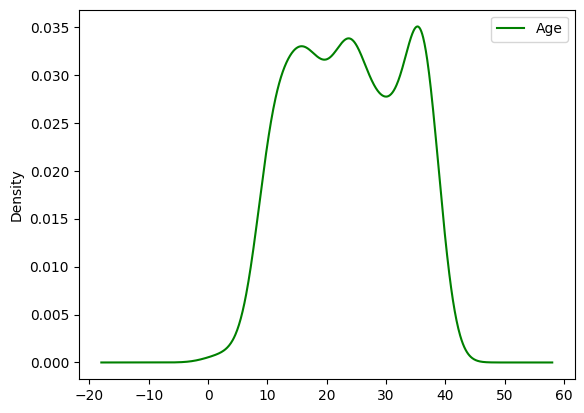

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax, color = 'green')
# df.Age.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

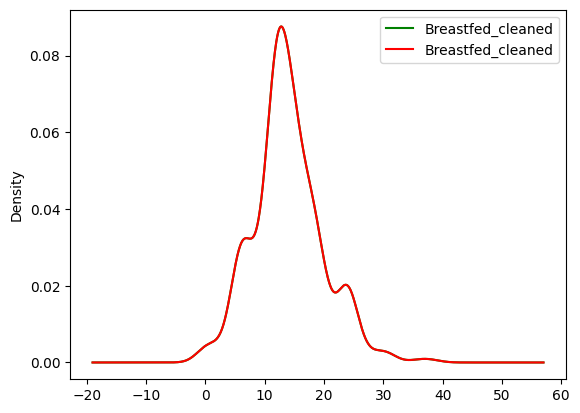

In [39]:
df['Breastfed_cleaned'] = pd.to_numeric(df['Breastfed_cleaned'], errors='coerce')
fig = plt.figure()
ax = fig.add_subplot(111)
df['Breastfed_cleaned'].plot(kind = 'kde', ax = ax, color = 'green')
df.Breastfed_cleaned.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

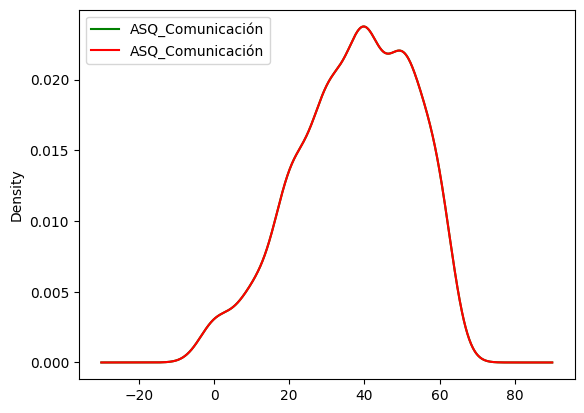

In [40]:
df['ASQ_Comunicación'] = pd.to_numeric(df['ASQ_Comunicación'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot(111)
df['ASQ_Comunicación'].plot(kind = 'kde', ax = ax, color = 'green')
df.ASQ_Comunicación.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

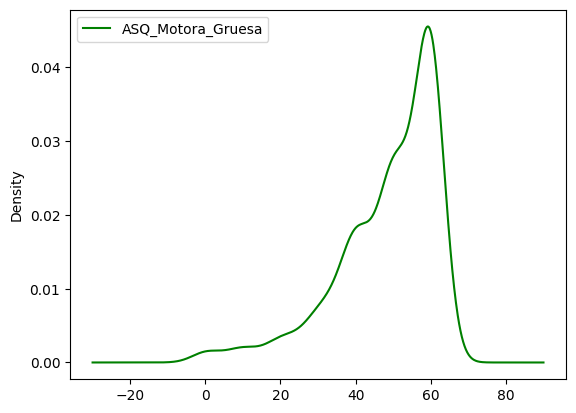

In [41]:
df['ASQ_Motora_Gruesa'] = pd.to_numeric(df['ASQ_Motora_Gruesa'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot(111)
df['ASQ_Motora_Gruesa'].plot(kind = 'kde', ax = ax, color = 'green')
# df.ASQ_Motora_Gruesa_random.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [42]:
df.columns

Index(['ID', 'Community', 'District', 'Age', 'Sex', 'Age of Mother at birth',
       'number of children', 'Age at first birth of mother', 'education',
       'ocupaction', 'toilet', 'radio', 'television', 'cellular', 'economy',
       'maternal_vitimans', 'illness_during_prenancy', 'illness of child',
       'diarrea days', 'CRED', 'location of birth', 'birth_weight',
       'Breastfed_cleaned', 'breastfed months', 'exclusive breastfed age',
       'micronutrients cleaned', 'micronutrients months', 'CHA visits',
       'CPVC visits', 'dewormer yes or no', 'dewormer', 'vacinations',
       'ASQ_Comunicación', 'ASQ_Motora_Gruesa', 'DIT Preg 01', 'DIT Preg 02',
       'DIT Preg 10', 'Cutoff_Comm', 'CutoffMotoraGruesa', 'Deficiencia Comm',
       'Deficiencia Motora Gruesa', 'Nivel de Deficiencia',
       'developmentaldelay', 'water', 'water treatment', 'electricity hours'],
      dtype='object')

Age_median                          0
Age_random                          0
illness_during_prenancy_median      0
illness_during_prenancy_random      0
birth_weight_median                 0
birth_weight_random                 0
Breastfed_cleaned_median            0
Breastfed_cleaned_random            0
vacinations_median                  0
vacinations_random                  0
ASQ_Comunicación_median             0
ASQ_Comunicación_random             0
ASQ_Motora_Gruesa_median            0
ASQ_Motora_Gruesa_random            0
maternal_vitimans_random            0
Cutoff_Comm_median                  0
Cutoff_Comm_random                  0
CutoffMotoraGruesa_median           0
CutoffMotoraGruesa_random

In [90]:
# Define X separately as a DataFrame
X = df[['Age', 'maternal_vitimans', 'Breastfed_cleaned', 'ASQ_Comunicación', 'ASQ_Motora_Gruesa']]

# Define y1 as the target variable for 'Cutoff Comm'
y1 = df['Cutoff_Comm']

# Define y2 as the target variable for 'Cutoff Motora Gruesa'
y2 = df['CutoffMotoraGruesa']


In [91]:

# Split the data into training and test sets for both target variables
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)


In [94]:
# Create a SimpleImputer to replace NaN values with the median for both y1_train and y2_train
imputer_y1 = SimpleImputer(strategy='median')
imputer_y2 = SimpleImputer(strategy='median')

# Fit and transform on y1_train
# y1_train = imputer_y1.fit_transform(y1_train.to_numpy().reshape(-1, 1)).flatten()

# Convert y2_train to a numerical array using numpy
y2_train = np.array(y2_train)

# Fit and transform on y2_train
# y2_train = imputer_y2.fit_transform(y2_train.reshape(-1, 1))


In [95]:
# Create a pipeline to train the classifier for 'Cutoff Comm'
pipeline_y1 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

# Fit the pipeline for 'Cutoff Comm'
pipeline_y1.fit(X_train, y1_train)

# Make predictions for 'Cutoff Comm'
y1_pred = pipeline_y1.predict(X_test)


ValueError: ignored

In [ ]:
# Create a pipeline to train the classifier for 'Cutoff Motora Gruesa'
pipeline_y2 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

# Fit the pipeline for 'Cutoff Motora Gruesa'
pipeline_y2.fit(X_train, y2_train)

# Make predictions for 'Cutoff Motora Gruesa'
y2_pred = pipeline_y2.predict(X_test)

# Calculate the accuracy of the predictions for both target variables
accuracy_y1 = accuracy_score(y1_test, y1_pred)
accuracy_y2 = accuracy_score(y2_test, y2_pred)

print(f"Accuracy for 'Cutoff Comm': {accuracy_y1:.2f}")
print(f"Accuracy for 'Cutoff Motora Gruesa': {accuracy_y2:.2f}")
